# Import Libraries

In [ ]:
#pandas: treat with the dataframe
import pandas as pd
#numpy: treat with the arrays
import numpy as np
#matplot: used in data visualization
import matplotlib.pyplot as plt
#seaborn: used in plotting
import seaborn as sns
#LabelEncoder: to encode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Load dataset



In [ ]:
#here the data in csv file, so we use read_csv
data = pd.read_csv('/content/first inten project.csv')

In [ ]:
#show first 5 rows in the data
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
#show only the name of colums
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [ ]:
#show the statistical information about data
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
#show the datatype for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

#Data Preprocessing

In [ ]:
#Check for Duplicates
data.duplicated().sum()

0

In [ ]:
#Check for Missing Values
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
#Convert 'date of reservation' to datetime format
data['date of reservation'] = pd.to_datetime(data['date of reservation'], format='%m/%d/%Y', errors='coerce')


In [ ]:
# Extract new features
data["reservation_month"] = data["date of reservation"].dt.month
data["reservation_weekday"] = data["date of reservation"].dt.weekday

In [ ]:
#Categorize 'lead time' into bins
data["lead_time_category"] = pd.cut(
    data["lead time"], bins=[0, 30, 90, 180, 365], labels=["Short", "Medium", "Long", "Very Long"], include_lowest=True)

In [ ]:
#Rename column to remove space
data.rename(columns={'average price ': 'average price'}, inplace=True)

In [ ]:
#Encode Categorical Features
categorical_cols = ["type of meal", "room type", "market segment type", "booking status", "lead_time_category"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [ ]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status,reservation_month,reservation_weekday,lead_time_category
0,1,0,2,5,0,0,0,224.0,3,0,88.00,0,1,10.0,4.0,3
1,1,0,1,3,3,0,0,5.0,4,0,106.68,1,1,11.0,1.0,2
2,2,0,1,3,0,0,0,1.0,4,0,50.00,0,0,2.0,2.0,2
3,1,0,0,2,0,0,0,211.0,4,0,100.00,1,0,5.0,5.0,3
4,1,0,1,2,3,0,0,48.0,4,0,77.00,0,0,4.0,2.0,1


In [ ]:
#Handle Outliers using IQR Method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)  # Cap values

outlier_columns = ["number of children", "number of weekend nights", "number of week nights", "lead time", "average price"]
for col in outlier_columns:
    cap_outliers(data, col)

In [ ]:
#Handle Missing Values
most_common_month = data['reservation_month'].mode()[0]
most_common_weekday = data['reservation_weekday'].mode()[0]

data.loc[:, 'reservation_month'] = data['reservation_month'].fillna(most_common_month)
data.loc[:, 'reservation_weekday'] = data['reservation_weekday'].fillna(most_common_weekday)
data.loc[:, 'lead_time_category'] = data['lead_time_category'].fillna('Unknown')


In [ ]:
#Convert Data Types
data.loc[:, 'reservation_month'] = data['reservation_month'].astype(int)
data.loc[:, 'reservation_weekday'] = data['reservation_weekday'].astype(int)


In [ ]:
#Drop Unnecessary Columns
columns_to_drop = ["Booking_ID", "P-C", "P-not-C", "date of reservation"]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#Check final dataset details
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int64  
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  int64  
 7   lead time                 36285 non-null  float64
 8   market segment type       36285 non-null  int64  
 9   repeated                  36285 non-null  int64  
 10  average price             36285 non-null  float64
 11  special requests          36285 non-null  int64  
 12  booking status            36285 non-null  int64  
 13  reservation_month         36285 non-null  float64
 14  reserv

#Data visualization

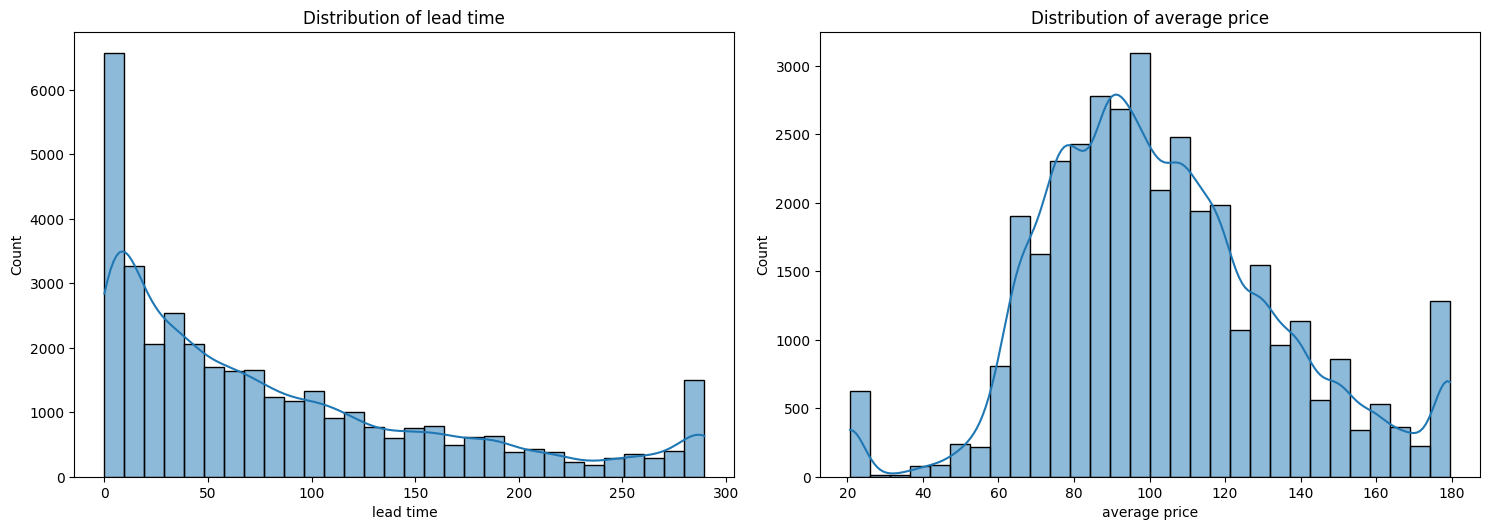

In [ ]:
# Define figure size
plt.figure(figsize=(15, 10))

#Distribution of numerical features
numeric_features = [ "lead time", "average price"]
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

<ipython-input-25-a46c7943624b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['booking status'], palette="Blues")


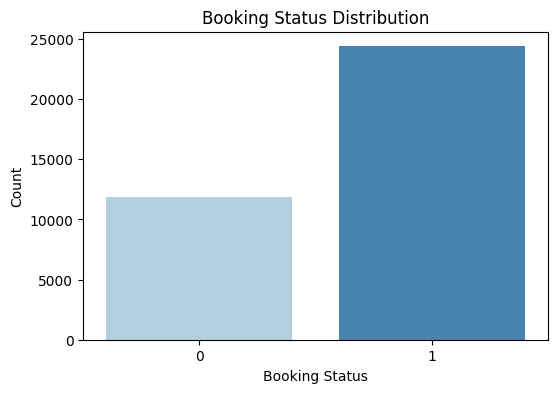

In [ ]:
#Booking status distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data['booking status'], palette="Blues")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

<ipython-input-28-85c0ca198ae4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="reservation_month", palette="Blues")


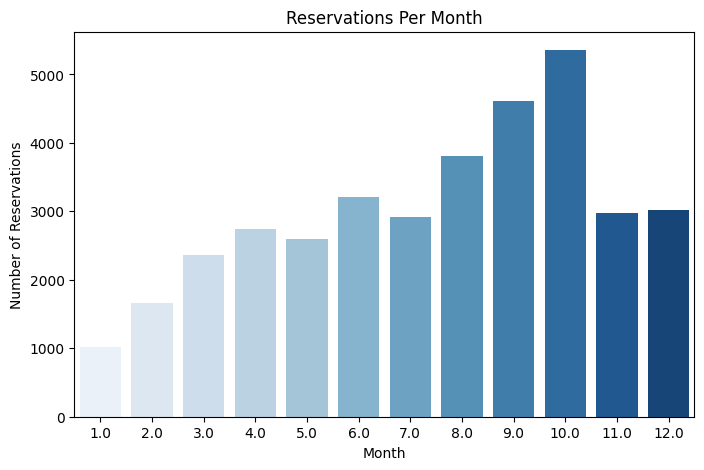

In [ ]:
#Seasonal booking trends (Reservations per month)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="reservation_month", palette="Blues")
plt.title("Reservations Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.show()

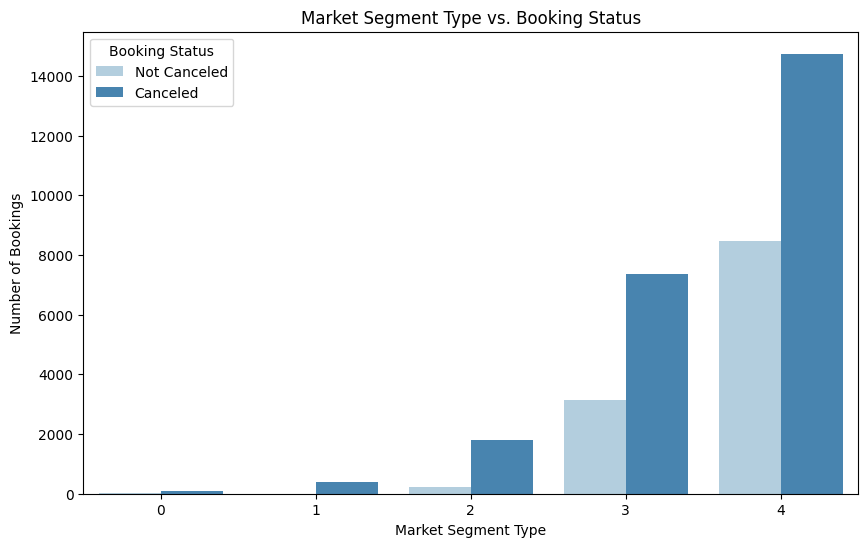

In [ ]:
#Market Segment Type vs. Booking Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="market segment type", hue="booking status", palette="Blues")
plt.title("Market Segment Type vs. Booking Status")
plt.xlabel("Market Segment Type")
plt.ylabel("Number of Bookings")
plt.legend(title="Booking Status", labels=["Not Canceled", "Canceled"])
plt.show()

#Train the model

In [ ]:
#Split Features & Target Variable
X = data.drop(columns=['booking status'])
y = data['booking status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Split Data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train KNN Classifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.18%
